In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Comparison of mkn_omp and mkn from Assignment 1

In [ ]:
memory_size = np.array([234.375, 937.500, 5859.375, 23437.500, 93750.000, 585937.500])
size = np.array([100, 200, 500, 1000, 2000, 5000])
mkn = np.array([
  [234.375,   3453.227], # 100
  [937.500,   3750.097], # 200
  [5859.375,   3969.795], # 500
  [23437.500,   4075.954], # 1000
  [93750.000,   3279.726], # 2000
  [585937.500,   2355.658], # 5000
])

mkn_omp_v1 = np.array([
    [234.375, 165.501],
    [937.500, 532.707 ],
    [5859.375, 1429.359],
    [23437.500, 3542.985],
    [93750.000, 4040.374],
    [585937.500, 2183.267],
])

mkn_omp = np.array([
    [234.375, 53309.589],
    [937.500, 170484.363],
    [5859.375, 205415.013],
    [23437.500, 222999.195],
    [93750.000, 84814.996],
    [585937.500, 51851.286],
])

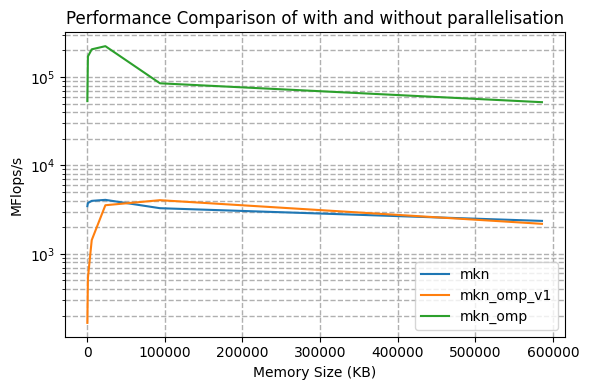

In [ ]:
# Define the data arrays
datasets = {
    "mkn": mkn,
    "mkn_omp_v1": mkn_omp_v1,
    "mkn_omp": mkn_omp
}

# Create the plot
plt.figure(figsize=(6, 4))
for label, data in datasets.items():
    plt.plot(data[:, 0], data[:, 1], label=label)

# Add titles and labels
plt.title("Performance Comparison of with and without parallelisation") # , fontsize=14
plt.xlabel("Memory Size (KB)") # , fontsize=12
plt.ylabel("MFlops/s") #, fontsize=12
plt.yscale("log")
plt.grid(True, which="both", linestyle="--", linewidth=1)
plt.legend()
plt.tight_layout()

# # Show the plot
plt.show()


# Performance of mnk_offload for various number of teams and threads

## Data input

In [23]:
data = [
    ["num_teams", "num_threads", "size", "memory", "mflops"],
    [1, 1, 100, 234.375, 238.517],
    [1, 1, 200, 937.500, 2064.474],
    [1, 1, 500, 5859.375, 18459.520],
    [1, 1, 1000, 23437.500, 111662.368],
    [1, 1, 2000, 93750.000, 293442.530],
    [1, 1, 5000, 585937.500, 213417.082],
    [1, 2, 100, 234.375, 287.188],
    [1, 2, 200, 937.500, 2496.046],
    [1, 2, 500, 5859.375, 22068.923],
    [1, 2, 1000, 23437.500, 130504.374],
    [1, 2, 2000, 93750.000, 266479.434],
    [1, 2, 5000, 585937.500, 214107.264],
    [1, 4, 100, 234.375, 311.372],
    [1, 4, 200, 937.500, 1753.396],
    [1, 4, 500, 5859.375, 13221.149],
    [1, 4, 1000, 23437.500, 131396.057],
    [1, 4, 2000, 93750.000, 234202.019],
    [1, 4, 5000, 585937.500, 214011.197],
    [1, 8, 100, 234.375, 215.050],
    [1, 8, 200, 937.500, 2478.631],
    [1, 8, 500, 5859.375, 23274.960],
    [1, 8, 1000, 23437.500, 183468.251],
    [1, 8, 2000, 93750.000, 278618.727],
    [1, 8, 5000, 585937.500, 215265.387],
    [1, 16, 100, 234.375, 134.507],
    [1, 16, 200, 937.500, 2206.231],
    [1, 16, 500, 5859.375, 21527.271],
    [1, 16, 1000, 23437.500, 144404.025],
    [1, 16, 2000, 93750.000, 285219.396],
    [1, 16, 5000, 585937.500, 214160.260],
    [1, 32, 100, 234.375, 292.561],
    [1, 32, 200, 937.500, 1935.606],
    [1, 32, 500, 5859.375, 21626.004],
    [1, 32, 1000, 23437.500, 147949.271],
    [1, 32, 2000, 93750.000, 281308.013],
    [1, 32, 5000, 585937.500, 213705.871],
    [1, 64, 100, 234.375, 202.898],
    [1, 64, 200, 937.500, 906.352],
    [1, 64, 500, 5859.375, 22463.497],
    [1, 64, 1000, 23437.500, 177999.133],
    [1, 64, 2000, 93750.000, 286076.238],
    [1, 64, 5000, 585937.500, 215347.721],
    [1, 128, 100, 234.375, 170.268],
    [1, 128, 200, 937.500, 1962.425],
    [1, 128, 500, 5859.375, 19279.623],
    [1, 128, 1000, 23437.500, 225526.006],
    [1, 128, 2000, 93750.000, 275476.607],
    [1, 128, 5000, 585937.500, 213492.532],
    [1, 256, 100, 234.375, 278.197],
    [1, 256, 200, 937.500, 1657.319],
    [1, 256, 500, 5859.375, 10945.634],
    [1, 256, 1000, 23437.500, 222712.773],
    [1, 256, 2000, 93750.000, 272771.489],
    [1, 256, 5000, 585937.500, 214040.336],
    [2, 2, 100, 234.375, 195.960],
    [2, 2, 200, 937.500, 1582.725],
    [2, 2, 500, 5859.375, 22325.103],
    [2, 2, 1000, 23437.500, 130949.790],
    [2, 2, 2000, 93750.000, 275220.771],
    [2, 2, 5000, 585937.500, 213692.538],
    [2, 4, 100, 234.375, 192.028],
    [2, 4, 200, 937.500, 4046.385],
    [2, 4, 500, 5859.375, 29380.114],
    [2, 4, 1000, 23437.500, 217245.918],
    [2, 4, 2000, 93750.000, 251615.264],
    [2, 4, 5000, 585937.500, 213185.607],
    [2, 8, 100, 234.375, 344.580],
    [2, 8, 200, 937.500, 4036.177],
    [2, 8, 500, 5859.375, 30776.175],
    [2, 8, 1000, 23437.500, 96403.397],
    [2, 8, 2000, 93750.000, 236545.874],
    [2, 8, 5000, 585937.500, 213617.857],
    [2, 16, 100, 234.375, 671.331],
    [2, 16, 200, 937.500, 3384.698],
    [2, 16, 500, 5859.375, 42350.221],
    [2, 16, 1000, 23437.500, 119910.208],
    [2, 16, 2000, 93750.000, 296098.091],
    [2, 16, 5000, 585937.500, 211805.865],
    [2, 32, 100, 234.375, 384.160],
    [2, 32, 200, 937.500, 3680.558],
    [2, 32, 500, 5859.375, 8525.101],
    [2, 32, 1000, 23437.500, 87788.492],
    [2, 32, 2000, 93750.000, 248265.451],
    [2, 32, 5000, 585937.500, 213278.543],
    [2, 64, 100, 234.375, 363.097],
    [2, 64, 200, 937.500, 1826.245],
    [2, 64, 500, 5859.375, 9510.348],
    [2, 64, 1000, 23437.500, 87707.494],
    [2, 64, 2000, 93750.000, 258113.861],
    [2,64,5000,585937.500,213697.282],
    [2,128,100,234.375,192.917],
    [2,128,200,937.500,2200.472],
    [2,128,500,5859.375,51822.632],
    [2,128,1000,23437.500,162559.904],
    [2,128,2000,93750.000,272874.015],
    [2,128,5000,585937.500,214013.401],
    [2,256,100,234.375,261.706],
    [2,256,200,937.500,2070.081],
    [2,256,500,5859.375,21860.491],
    [2,256,1000,23437.500,207637.815],
    [2,256,2000,93750.000,280175.089],
    [2,256,5000,585937.500,214179.695],
    [4,4,100,234.375,529.216],
    [4,4,200,937.500,905.327],
    [4,4,500,5859.375,16988.131],
    [4,4,1000,23437.500,172932.796],
    [4,4,2000,93750.000,272242.432],
    [4,4,5000,585937.500,213708.611],
    [4,8,100,234.375,113.493],
    [4,8,200,937.500,851.917],
    [4,8,500,5859.375,50259.774],
    [4,8,1000,23437.500,178330.8],
    [4,8,2000,93750.000,288922.632],
    [4,8,5000,585937.500,214275.888],
    [4,16,100,234.375,604.033],
    [4,16,200,937.500,5306.523],
    [4,16,500,5859.375,27336.903],
    [4,16,1000,23437.500,179627.432],
    [4,16,2000,93750.000,279085.230],
    [4,16,5000,585937.500,214553.571],
    [4,32,100,234.375,214.083],
    [4,32,200,937.500,4770.423],
    [4,32,500,5859.375,22411.140],
    [4,32,1000,23437.500,177334.095],
    [4,32,2000,93750.000,275770.984],
    [4,32,5000,585937.500,214529.822],
    [4,64,100,234.375,663.311],
    [4,64,200,937.500,1984.337],
    [4,64,500,5859.375,32734.779],
    [4,64,1000,23437.500,178984.421],
    [4,64,2000,93750.000,291985.952],
    [4,64,5000,585937.500,214641.991],
    [4,128,100,234.375,656.136],
    [4,128,200,937.500,1569.391],
    [4,128,500,5859.375,54595.203],
    [4,128,1000,23437.500,172858.650],
    [4,128,2000,93750.000,275315.440],
    [4,128,5000,585937.500,215313.774],
    [4,256,100,234.375,195.024],
    [4,256,200,937.500,1576.174],
    [4,256,500,5859.375,25206.296],
    [4,256,1000,23437.500,170255.525],
    [4,256,2000,93750.000,279812.889],
    [4,256,5000,585937.500,214435.078],
    [8,8,100,234.375,201.467],
    [8,8,200,937.500,2043.904],
    [8,8,500,5859.375,17110.201],
    [8,8,1000,23437.500,150498.859],
    [8,8,2000,93750.000,280602.525],
    [8,8,5000,585937.500,213697.282],
    [8,16,100,234.375,265.211],
    [8,16,200,937.500,2169.445],
    [8,16,500,5859.375,16455.870],
    [8,16,1000,23437.500,178093.457],
    [8,16,2000,93750.000,272836.608],
    [8,16,5000,585937.500,214147.041],
    [8,32,100,234.375,198.272],
    [8,32,200,937.500,2220.016],
    [8,32,500,5859.375,19208.374],
    [8,32,1000,23437.500,220066.624],
    [8,32,2000,93750.000,244565.498],
    [8,32,5000,585937.500,214526.507],
    [8,64,100,234.375,264.579],
    [8,64,200,937.500,1543.486],
    [8,64,500,5859.375,22795.334],
    [8,64,1000,23437.500,131768.305],
    [8,64,2000,93750.000,274611.325],
    [8,64,5000,585937.500,214204.470],
    [8,128,100,234.375,267.736],
    [8,128,200,937.500,2233.649],
    [8,128,500,5859.375,16694.469],
    [8,128,1000,23437.500,225398.923],
    [8,128,2000,93750.000,276299.917],
    [8,128,5000,585937.500,214258.262],
    [8,256,100,234.375,278.584],
    [8,256,200,937.500,2136.416],
    [8,256,500,5859.375,19077.930],
    [8,256,1000,23437.500,213375.506],
    [8,256,2000,93750.000,303201.732],
    [8,256,5000,585937.500,213589.749],
    [16,16,100,234.375,266.874],
    [16,16,200,937.500,2218.476],
    [16,16,500,5859.375,19418.762],
    [16,16,1000,23437.500,219752.283],
    [16,16,2000,93750.000,280111.276],
    [16,16,5000,585937.500,214454.555],
    [16,32,100,234.375,271.144],
    [16,32,200,937.500,2159.813],
    [16,32,500,5859.375,23019.925],
    [16,32,1000,23437.500,125241.504],
    [16,32,2000,93750.000,273204.650],
    [16,32,5000,585937.500,213846.262],
    [16,64,100,234.375,233.205],
    [16,64,200,937.500,1632.624],
    [16,64,500,5859.375,22411.160],
    [16,64,1000,23437.500,225399.172],
    [16,64,2000,93750.000,245537.521],
    [16,64,5000,585937.500,214447.745],
    [16,128,100,234.375,251.852],
    [16,128,200,937.500,2167.973],
    [16,128,500,5859.375,16612.140],
    [16,128,1000,23437.500,172574.962],
    [16,128,2000,93750.000,304286.127],
    [16,128,5000,585937.500,214433.216],
    [16,256,100,234.375,272.256],
    [16,256,200,937.500,2055.460],
    [16,256,500,5859.375,27691.115],
    [16,256,1000,23437.500,177538.584],
    [16,256,2000,93750.000,300903.707],
    [16,256,5000,585937.500,214783.062],
    [32,32,100,234.375,204.684],
    [32,32,200,937.500,3548.327],
    [32,32,500,5859.375,19564.637],
    [32,32,1000,23437.500,164853.014],
    [32,32,2000,93750.000,274785.917],
    [32,32,5000,585937.500,214031.903],
    [32,64,100,234.375,270.593],
    [32,64,200,937.500,866.544],
    [32,64,500,5859.375,18799.612],
    [32,64,1000,23437.500,162745.225],
    [32,64,2000,93750.000,294154.544],
    [32,64,5000,585937.500,212947.161],
    [32,128,100,234.375,198.547],
    [32,128,200,937.500,2038.171],
    [32,128,500,5859.375,16730.066],
    [32,128,1000,23437.500,176179.800],
    [32,128,2000,93750.000,276998.061],
    [32,128,5000,585937.500,215014.523],
    [32,256,100,234.375,636.533],
    [32,256,200,937.500,2120.563],
    [32,256,500,5859.375,19540.185],
    [32,256,1000,23437.500,166817.538],
    [32,256,2000,93750.000,289324.870],
    [32,256,5000,585937.500,213339.694],
    [64,64,100,234.375,211.569],
    [64,64,200,937.500,1470.160],
    [64,64,500,5859.375,22107.935],
    [64,64,1000,23437.500,174868.784],
    [64,64,2000,93750.000,280130.844],
    [64,64,5000,585937.500,213872.789],
    [64,128,100,234.375,264.755],
    [64,128,200,937.500,2241.789],
    [64,128,500,5859.375,51070.989],
    [64,128,1000,23437.500,165437.643],
    [64,128,2000,93750.000,276758.399],
    [64,128,5000,585937.500,214213.281],
    [64,256,100,234.375,253.867],
    [64,256,200,937.500,900.437],
    [64,256,500,5859.375,22497.883],
    [64,256,1000,23437.500,173487.976],
    [64,256,2000,93750.000,284438.495],
    [64,256,5000,585937.500,212165.366],
    [114,128,100,234.375,268.487],
    [114,128,200,937.500,2083.559],
    [114,128,500,5859.375,23591.233],
    [114,128,1000,23437.500,146884.324],
    [114,128,2000,93750.000,270264.989],
    [114,128,5000,585937.500,214720.711],
    [114,256,100,234.375,263.812],
    [114,256,200,937.500,1541.850],
    [114,256,500,5859.375,50360.920],
    [114,256,1000,23437.500,181964.629],
    [114,256,2000,93750.000,278086.052],
    [114,256,5000,585937.500,214089.091],
]

In [ ]:
# Convert data to DataFrame
df = pd.DataFrame(data[1:], columns=data[0])

# Convert columns to appropriate data types
data = df.astype({
    "num_teams": int,
    "num_threads": int,
    "size": int,
    "memory": float,
    "mflops": float
})

## Plots and computations

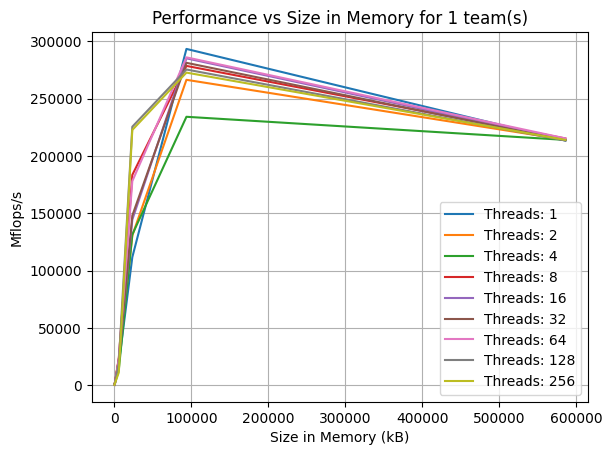

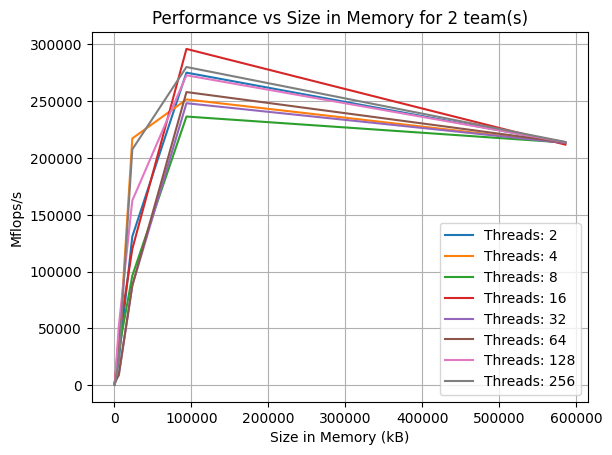

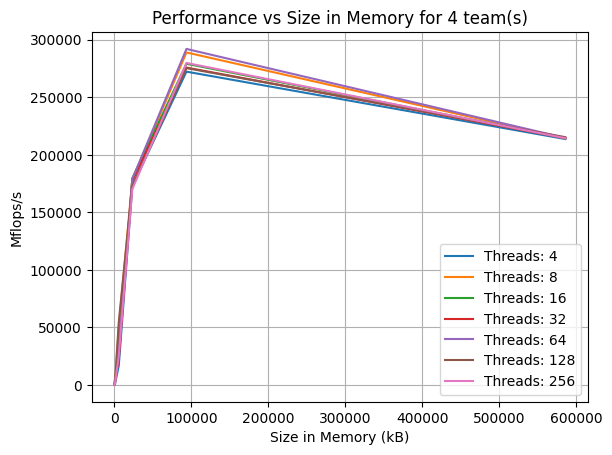

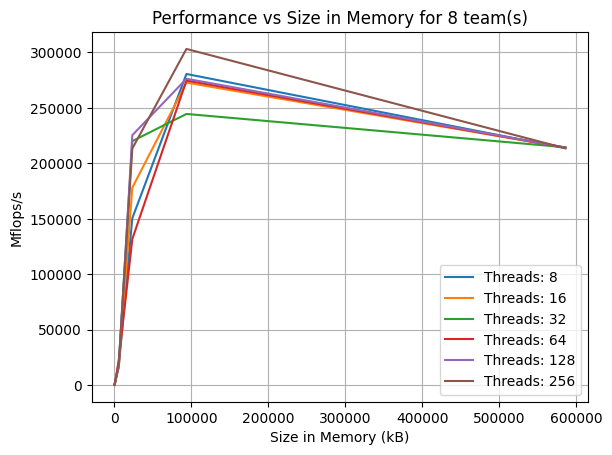

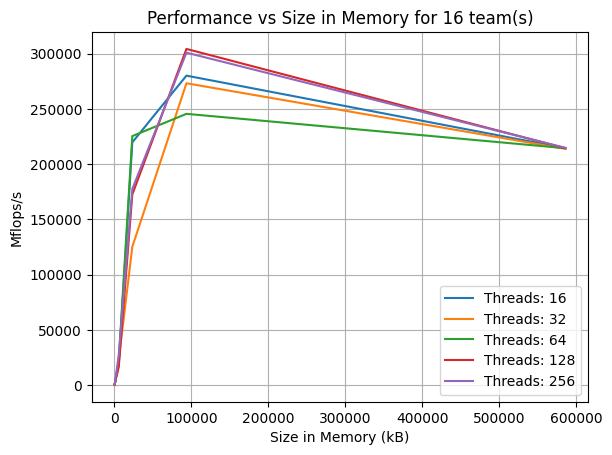

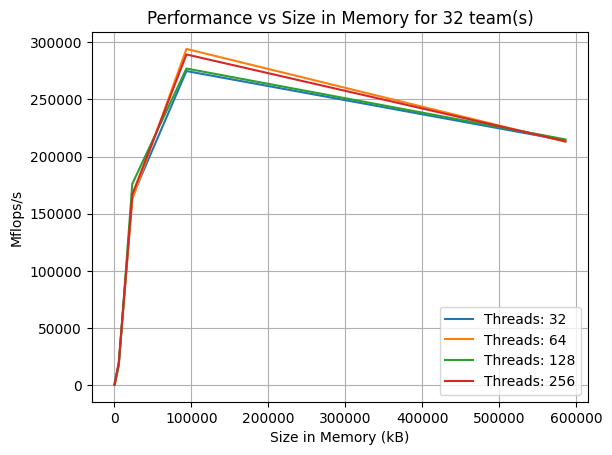

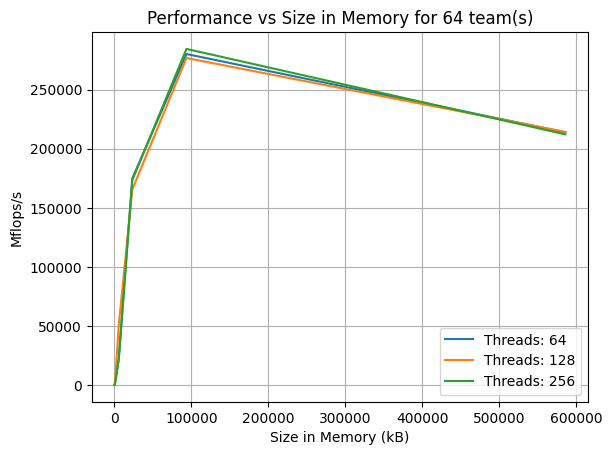

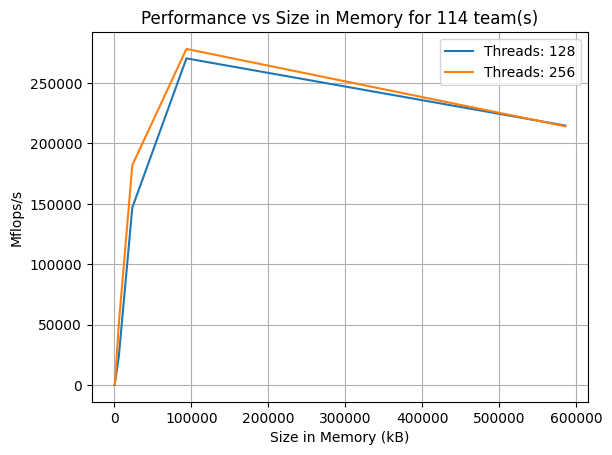

In [86]:
# Get unique number of teams
num_teams_unique = df["num_teams"].unique()

# Plot each subplot for each number of teams with all num_threads plotted
for team in num_teams_unique:
    subset = df[df["num_teams"] == team]
    for threads in subset["num_threads"].unique():
        thread_subset = subset[subset["num_threads"] == threads]
        plt.plot(thread_subset["memory"], thread_subset["mflops"], label=f"Threads: {threads}")

    plt.xlabel("Size in Memory (kB)")
    plt.ylabel("Mflops/s")
    plt.title(f"Performance vs Size in Memory for {team} team(s)")
    plt.legend()
    plt.grid(True)
    plt.show()

In [97]:
# Determine the optimal number of threads for each number of teams based on average mflops
optimal_threads = df.groupby(["num_teams", "num_threads"])["mflops"].mean().reset_index()
optimal_threads = optimal_threads.loc[optimal_threads.groupby("num_teams")["mflops"].idxmax()]

In [98]:
optimal_threads

,num_teams,num_threads,mflops
7,1,128,122651.243500
16,2,256,121030.812833
18,4,8,122125.750667
29,8,256,125276.652833
30,16,16,122703.704333
38,32,256,115296.563833
40,64,128,118331.142667
43,114,256,121051.059000


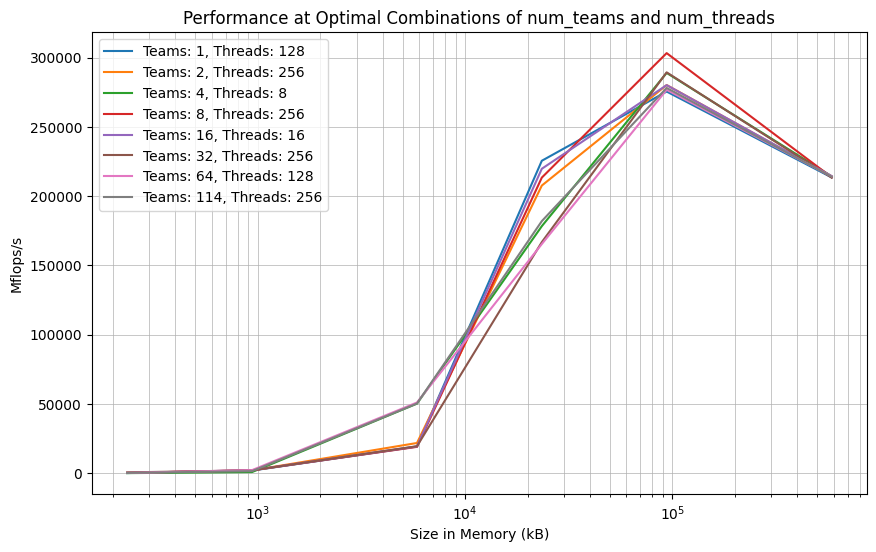

In [70]:
# Plot performance versus size in memory for each optimal combination of num_teams and num_threads
plt.figure(figsize=(10,6))
for _, row in optimal_threads.iterrows():
    team = int(row["num_teams"])
    threads = int(row["num_threads"])
    subset = df[(df["num_teams"] == team) & (df["num_threads"] == threads)]
    plt.plot(subset["memory"], subset["mflops"], label=f"Teams: {team}, Threads: {threads}")

plt.xlabel("Size in Memory (kB)")
plt.ylabel("Mflops/s")
plt.xscale("log")
plt.title("Performance at Optimal Combinations of num_teams and num_threads")
plt.legend()
plt.grid(True, which="both", linewidth=0.5)
plt.show()